In [ ]:
import pandas as pd

df = pd.read_csv('advertising.csv')
display(df.head())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Shape of the data: (200, 4)

Data types and descriptive statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


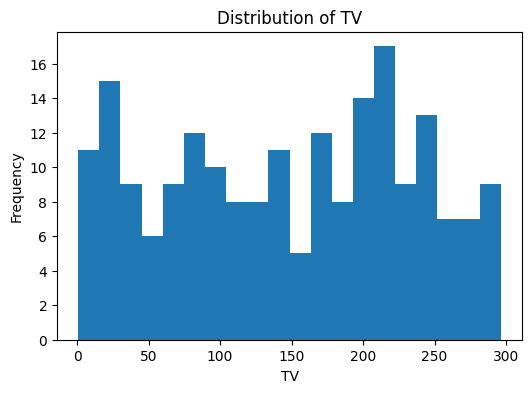

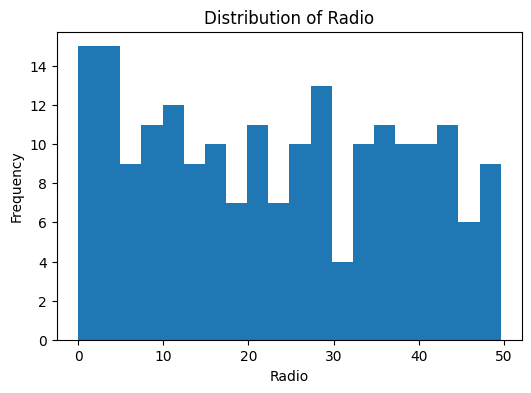

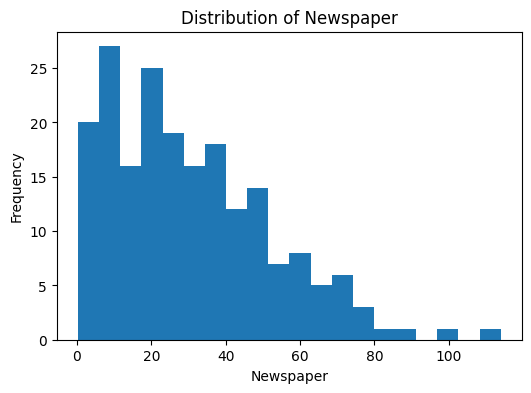

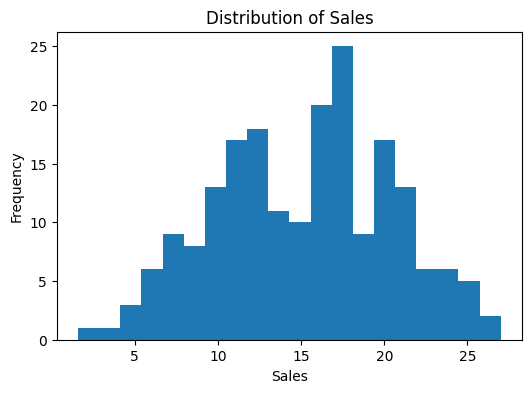

In [ ]:
# Examine the shape of the data
print(f"Shape of the data: {df.shape}")

# View data types and descriptive statistics
print("\nData types and descriptive statistics:")
print(df.info())
print(df.describe())

# Analyze the distribution of variables (numerical only)
import matplotlib.pyplot as plt

numerical_cols = ['TV', 'Radio', 'Newspaper', 'Sales']
for col in numerical_cols:
  plt.figure(figsize=(6, 4))
  plt.hist(df[col], bins=20)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col}')
  plt.show()

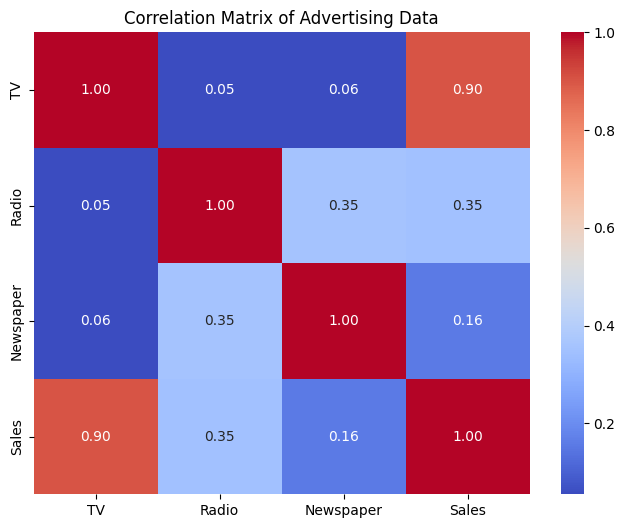

In [ ]:
# Investigate the correlation between variables
correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Advertising Data')
plt.show()

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If there are missing values, handle them appropriately (e.g., imputation with mean, median, or a specific value)
# For example, if there are missing values in 'TV', you can impute them with the mean:
# df['TV'].fillna(df['TV'].mean(), inplace=True)

Missing values in each column:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


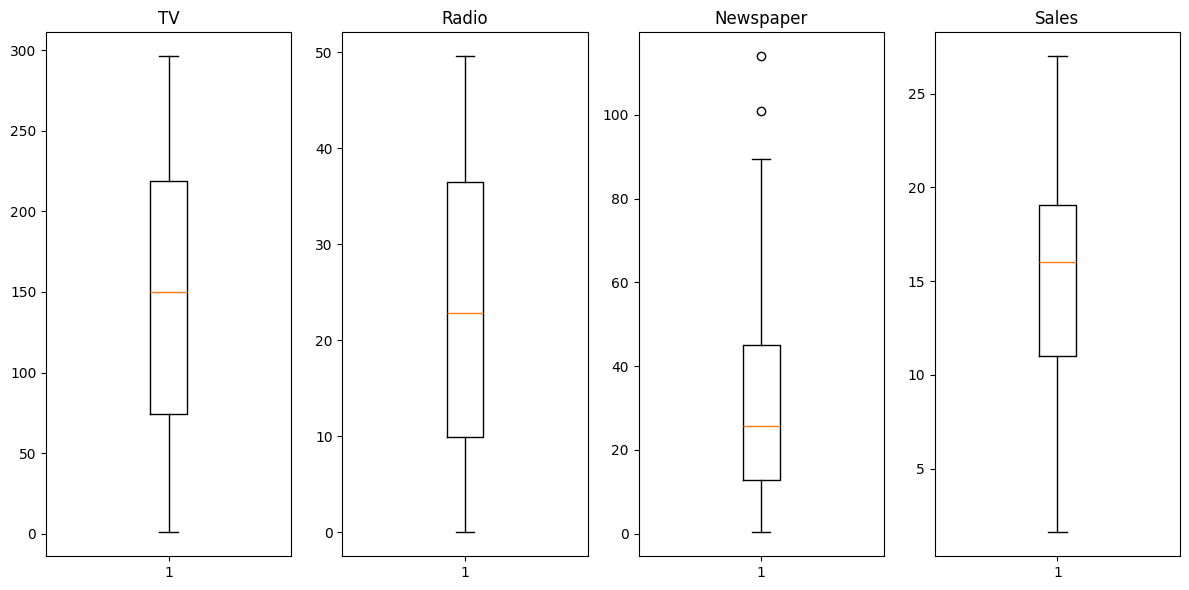

In [ ]:
import matplotlib.pyplot as plt

# Create box plots for each variable to identify potential outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(['TV', 'Radio', 'Newspaper', 'Sales']):
  plt.subplot(1, 4, i + 1)
  plt.boxplot(df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Investigate potential outliers in 'Newspaper'
print(df[df['Newspaper'] > 100])

# Decide on a strategy to handle outliers (e.g., remove, transform, or keep as is)
# For example, if we want to remove outliers above a certain threshold:
# df = df[df['Newspaper'] <= 100]

        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8


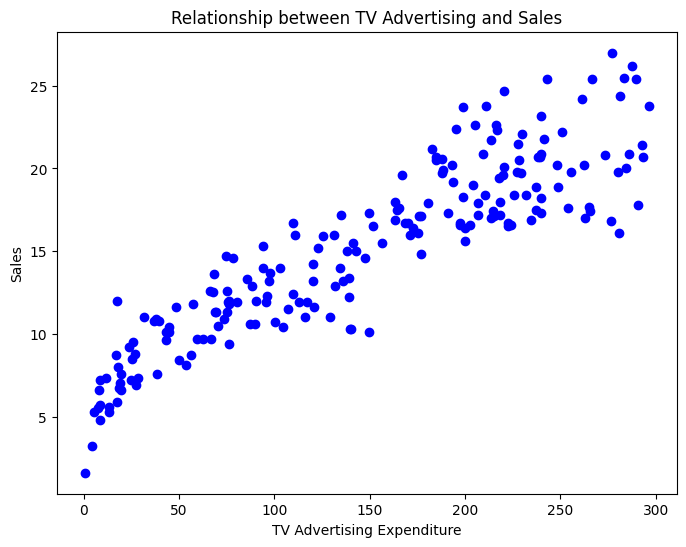

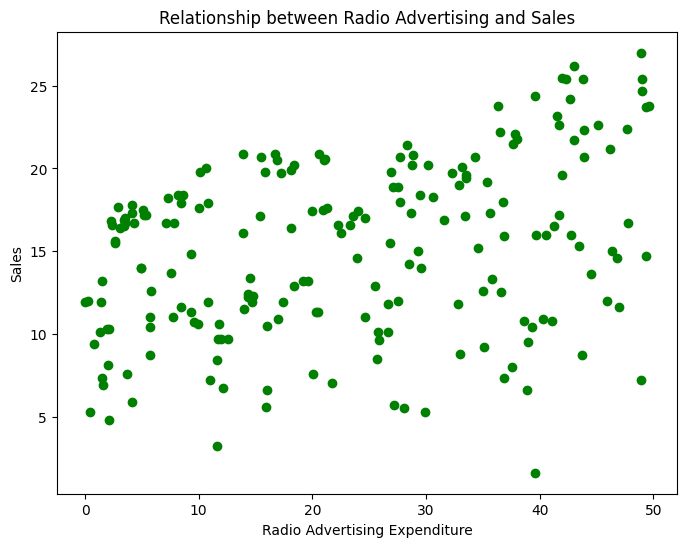

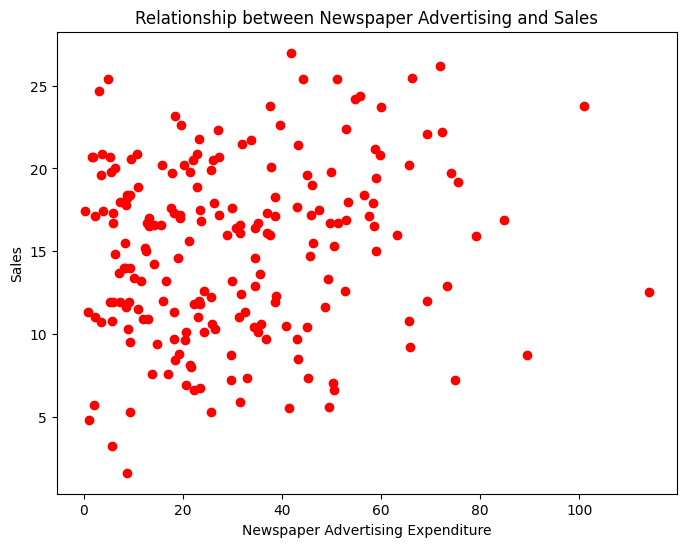

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: TV vs. Sales
plt.figure(figsize=(8, 6))
plt.scatter(df['TV'], df['Sales'], color='blue')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Relationship between TV Advertising and Sales')
plt.show()

# Scatter plot: Radio vs. Sales
plt.figure(figsize=(8, 6))
plt.scatter(df['Radio'], df['Sales'], color='green')
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Relationship between Radio Advertising and Sales')
plt.show()

# Scatter plot: Newspaper vs. Sales
plt.figure(figsize=(8, 6))
plt.scatter(df['Newspaper'], df['Sales'], color='red')
plt.xlabel('Newspaper Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Relationship between Newspaper Advertising and Sales')
plt.show()

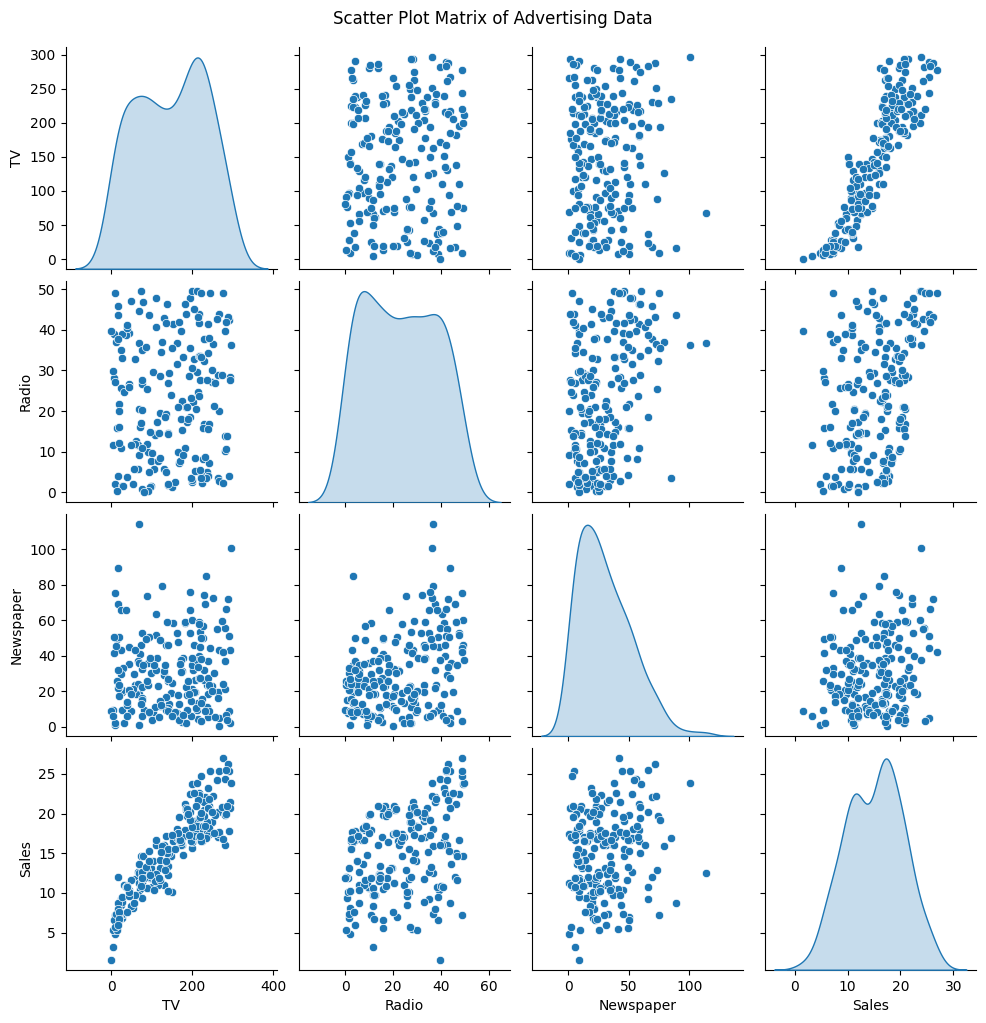

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot matrix
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Scatter Plot Matrix of Advertising Data', y=1.02)
plt.show()

<ipython-input-9-025041ade942>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_by_tv_bin = df.groupby('TV_bin')['Sales'].mean()


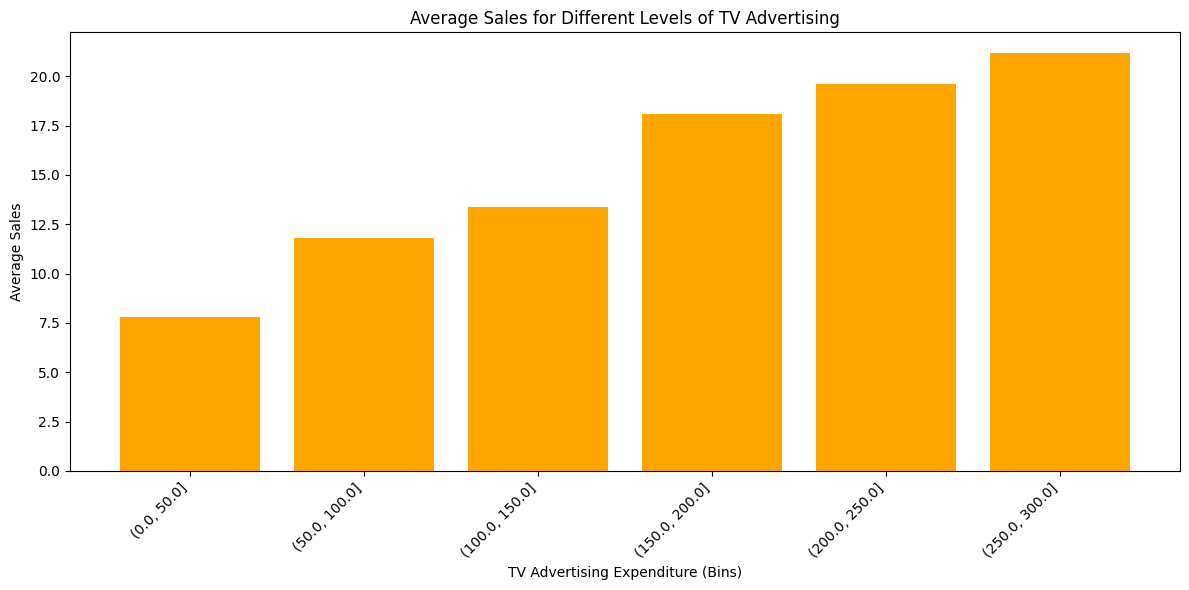

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Group TV values into bins
bins = np.arange(0, df['TV'].max() + 50, 50)
df['TV_bin'] = pd.cut(df['TV'], bins=bins)

# Calculate average sales for each bin
avg_sales_by_tv_bin = df.groupby('TV_bin')['Sales'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(avg_sales_by_tv_bin.index.astype(str), avg_sales_by_tv_bin.values, color='orange')
plt.xlabel('TV Advertising Expenditure (Bins)')
plt.ylabel('Average Sales')
plt.title('Average Sales for Different Levels of TV Advertising')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Create interaction terms
df['TV_Radio'] = df['TV'] * df['Radio']
df['TV_Newspaper'] = df['TV'] * df['Newspaper']
df['Radio_Newspaper'] = df['Radio'] * df['Newspaper']


Calculate ratios between advertising channels to highlight the relative importance of each channel.



In [ ]:
# Calculate ratios
df['TV_Ratio'] = df['TV'] / (df['TV'] + df['Radio'] + df['Newspaper'])
df['Radio_Ratio'] = df['Radio'] / (df['TV'] + df['Radio'] + df['Newspaper'])
df['Newspaper_Ratio'] = df['Newspaper'] / (df['TV'] + df['Radio'] + df['Newspaper'])

In [ ]:
# Add polynomial features
df['TV_Squared'] = df['TV'] ** 2
df['Radio_Squared'] = df['Radio'] ** 2
df['Newspaper_Squared'] = df['Newspaper'] ** 2

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Sales', axis=1)
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.drop('TV_bin', axis=1)
X_test = X_test.drop('TV_bin', axis=1)

# Instantiate a LinearRegression object
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predict sales on the test dataset
y_pred = model.predict(X_test)

# Calculate the R-squared, MSE, and RMSE
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the metrics
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R-squared: 0.9440
Mean Squared Error (MSE): 1.7298
Root Mean Squared Error (RMSE): 1.3152


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid for Ridge regression
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create a Ridge regression model
ridge_model = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Re-train the model with the best hyperparameters
optimized_model = Ridge(alpha=best_alpha)
optimized_model.fit(X_train, y_train)

# Predict sales on the test dataset using the optimized model
y_pred_optimized = optimized_model.predict(X_test)

# Evaluate the performance of the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
print(f"Optimized Model MSE: {mse_optimized:.4f}")
print(f"Optimized Model RMSE: {rmse_optimized:.4f}")

Best alpha: 0.1
Optimized Model MSE: 1.5882
Optimized Model RMSE: 1.2602


In [ ]:
# Evaluate the performance of the original model (before hyperparameter tuning)
y_pred_original = model.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred_original)
rmse_original = np.sqrt(mse_original)

print(f"Original Model MSE: {mse_original:.4f}")
print(f"Original Model RMSE: {rmse_original:.4f}")

print("\nComparison:")
print(f"Original Model RMSE: {rmse_original:.4f}")
print(f"Optimized Model RMSE: {rmse_optimized:.4f}")

if rmse_optimized < rmse_original:
  print("Hyperparameter tuning improved the model's performance.")
else:
  print("Hyperparameter tuning did not significantly improve the model's performance.")

Original Model MSE: 1.7298
Original Model RMSE: 1.3152

Comparison:
Original Model RMSE: 1.3152
Optimized Model RMSE: 1.2602
Hyperparameter tuning improved the model's performance.
